In a data exploration notebook, particularly for a dataset like the Kaggle House Prices dataset, a comprehensive exploratory data analysis (EDA) is crucial for understanding the underlying patterns, relationships, and potential idiosyncrasies of the data. This step is foundational before moving into more advanced modeling or prediction tasks. Here are some essential analyses you might consider including in your data exploration notebook:

### 1. **Descriptive Statistics**
Start by summarizing the central tendencies, dispersion, and shape of the dataset's distribution with summary statistics:
- **Count, mean, median, mode**: Understand the central tendency of your data.
- **Standard deviation, variance**: Assess the dispersion of your data.
- **Skewness and kurtosis**: Evaluate the asymmetry and tailedness of the distribution.
- **Min/max values**: Identify the range of data values.

### 2. **Distribution of Variables**
Analyze the distribution of key variables using visualizations:
- **Histograms**: To see the distribution of numeric variables.
- **Box plots**: To check for outliers and the spread of the data.
- **Bar charts**: For categorical data, to understand the frequency of categories.

### 3. **Correlation Analysis**
Understanding how the features relate to the target variable and to each other can guide feature selection and initial model building:
- **Correlation matrix**: Use heatmaps to visualize correlations between numerical features.
- **Scatter plots**: To visualize relationships between pairs of variables, especially with the target variable.

### 4. **Missing Data Analysis**
Identify and visualize missing data to decide on the necessary steps to handle it:
- **Heatmap or bar chart of missing values**: Visualize the pattern of missingness.
- **Percentage list of missing data**: Assess the extent of missing data in each column.

### 5. **Outlier Detection**
Outliers can significantly affect model performance, especially in regression problems:
- **Visual methods (box plots, scatter plots)**: To spot outliers visually.
- **Statistical tests (Z-score, IQR)**: For detecting outliers numerically.

### 6. **Feature Engineering Potential**
Identify possibilities for creating new features that could be more informative than the existing ones:
- **Combining features**: E.g., creating a total area feature from basement, first floor, and second floor areas.
- **Transformations**: Log transformation, polynomial features, etc.

### 7. **Temporal Analysis** (if applicable)
If the dataset includes temporal data (like year built or year sold):
- **Trend analysis**: How does the price vary over time?
- **Seasonality analysis**: Are there specific times of the year when prices spike?

### 8. **Text and Categorical Data Analysis**
For datasets with textual or categorical data:
- **Word cloud for text data**: If any open text fields are available.
- **Value counts and frequency distribution charts**: For categorical fields to understand the distribution of categories.

### 9. **Comparative Analysis**
If the data allows, compare different groups:
- **Group by analysis**: Such as comparing prices by neighborhood, zoning classification, or style of home.
- **Pivot tables**: Useful for slicing the data in multiple dimensions.

### 10. **Initial Predictive Modeling**
While primarily reserved for later stages, a simple predictive model:
- **Linear regression model**: Quickly model the relationship between the target and some selected features to understand the predictive power of the data.

### Software and Tools
For all of the above, you can use tools like:
- **Python libraries**: Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn.
- **Jupyter Notebook**: Ideal for EDA because it allows you to combine code, output, and descriptions in one place.

These steps provide a thorough preliminary analysis of the data, preparing you for more detailed and specific analyses as your project progresses.

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<Axes: >

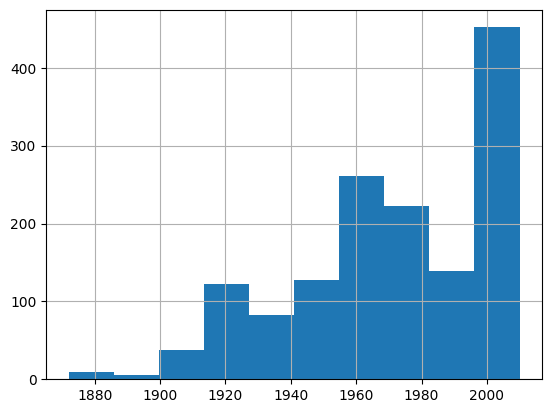

In [8]:
# Curious to see the distribution of years built, given Boston is a city with much historic architecture
df.YearBuilt.hist()

In [11]:
# Given the large number of variables in this dataset I'm curious to find highly-correlated variables 
# that are potentially providing redundant information

def calculate_correlations(dataframe):
    # Calculate correlation matrix
    corr_matrix = dataframe.corr(numeric_only=True)

    # Flatten the correlation matrix and convert to a DataFrame for easy manipulation
    corr_flat = corr_matrix.unstack().reset_index()
    corr_flat.columns = ['Variable1', 'Variable2', 'Correlation']

    # Remove self-correlations (correlation of variables with themselves)
    corr_flat = corr_flat[corr_flat['Variable1'] != corr_flat['Variable2']]

    # Calculate absolute correlation
    corr_flat['AbsCorrelation'] = corr_flat['Correlation'].abs()

    # Sort by absolute correlation in descending order
    sorted_corr = corr_flat.sort_values(by='AbsCorrelation', ascending=False)

    return sorted_corr


# Calculating correlations
result = calculate_correlations(df)

<Axes: >

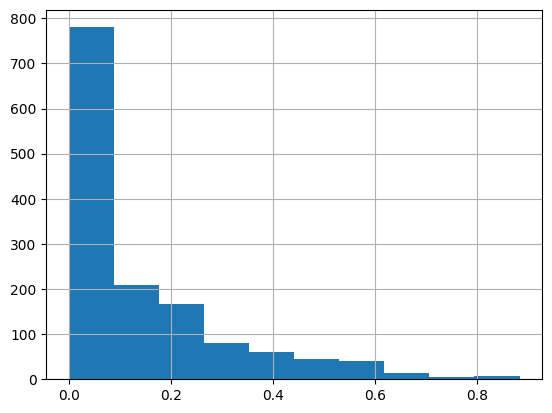

In [14]:
result.AbsCorrelation.hist()